In [4]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation,Dense,Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical


from numpy import nan as NA

import pandas as pd

In [5]:
import seaborn as sb

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)

In [7]:
#날씨간의 다중공선성(Multicollinearity) 확인을 통해 날씨 factor들의 독립성을 확보   


cor_weather=pd.read_csv("./weather-bigcon/weather_cor.csv",sep=",")
cor_weather

,weather,cloud,rain,snow,wind,temp,temp_minus,humid,sun,bad,pm10
0,CORR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cloud,1.0000,0.3475,0.0941,-0.0669,0.0912,-0.5937,0.5911,-0.5846,0.0171,0.0470
2,rain,0.3475,1.0000,0.0046,-0.0556,0.1566,-0.3870,0.5185,-0.3221,0.1360,-0.2096
3,snow,0.0941,0.0046,1.0000,-0.0060,-0.1655,-0.1231,0.0626,-0.1500,-0.1944,0.0098
4,wind,-0.0669,-0.0556,-0.0060,1.0000,-0.2130,-0.1609,-0.1518,0.0320,-0.2233,-0.0601
5,temp,0.0912,0.1566,-0.1655,-0.2130,1.0000,0.0198,0.4382,0.4762,0.9901,-0.3287
6,temp_minus,-0.5937,-0.3870,-0.1231,-0.1609,0.0198,1.0000,-0.5308,0.6082,0.1035,0.1998
7,humid,0.5911,0.5185,0.0626,-0.1518,0.4382,-0.5308,1.0000,-0.3316,0.3884,-0.1863
8,sun,-0.5846,-0.3221,-0.1500,0.0320,0.4762,0.6082,-0.3316,1.0000,0.5240,-0.1048
9,bad,0.0171,0.1360,-0.1944,-0.2233,0.9901,0.1035,0.3884,0.5240,1.0000,-0.3202


In [8]:

df_check=cor_weather.isnull()

df_check

cor_weather.loc[1][1]

1.0

In [9]:

cor_weather_result= cor_weather.set_index("weather")

cor_weather_result
# drop(index)
# df2.set_index("C2")

,cloud,rain,snow,wind,temp,temp_minus,humid,sun,bad,pm10
weather,,,,,,,,,,
CORR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cloud,1.0000,0.3475,0.0941,-0.0669,0.0912,-0.5937,0.5911,-0.5846,0.0171,0.0470
rain,0.3475,1.0000,0.0046,-0.0556,0.1566,-0.3870,0.5185,-0.3221,0.1360,-0.2096
snow,0.0941,0.0046,1.0000,-0.0060,-0.1655,-0.1231,0.0626,-0.1500,-0.1944,0.0098
wind,-0.0669,-0.0556,-0.0060,1.0000,-0.2130,-0.1609,-0.1518,0.0320,-0.2233,-0.0601
temp,0.0912,0.1566,-0.1655,-0.2130,1.0000,0.0198,0.4382,0.4762,0.9901,-0.3287
temp_minus,-0.5937,-0.3870,-0.1231,-0.1609,0.0198,1.0000,-0.5308,0.6082,0.1035,0.1998
humid,0.5911,0.5185,0.0626,-0.1518,0.4382,-0.5308,1.0000,-0.3316,0.3884,-0.1863
sun,-0.5846,-0.3221,-0.1500,0.0320,0.4762,0.6082,-0.3316,1.0000,0.5240,-0.1048


Text(205.0, 0.5, 'Weather')

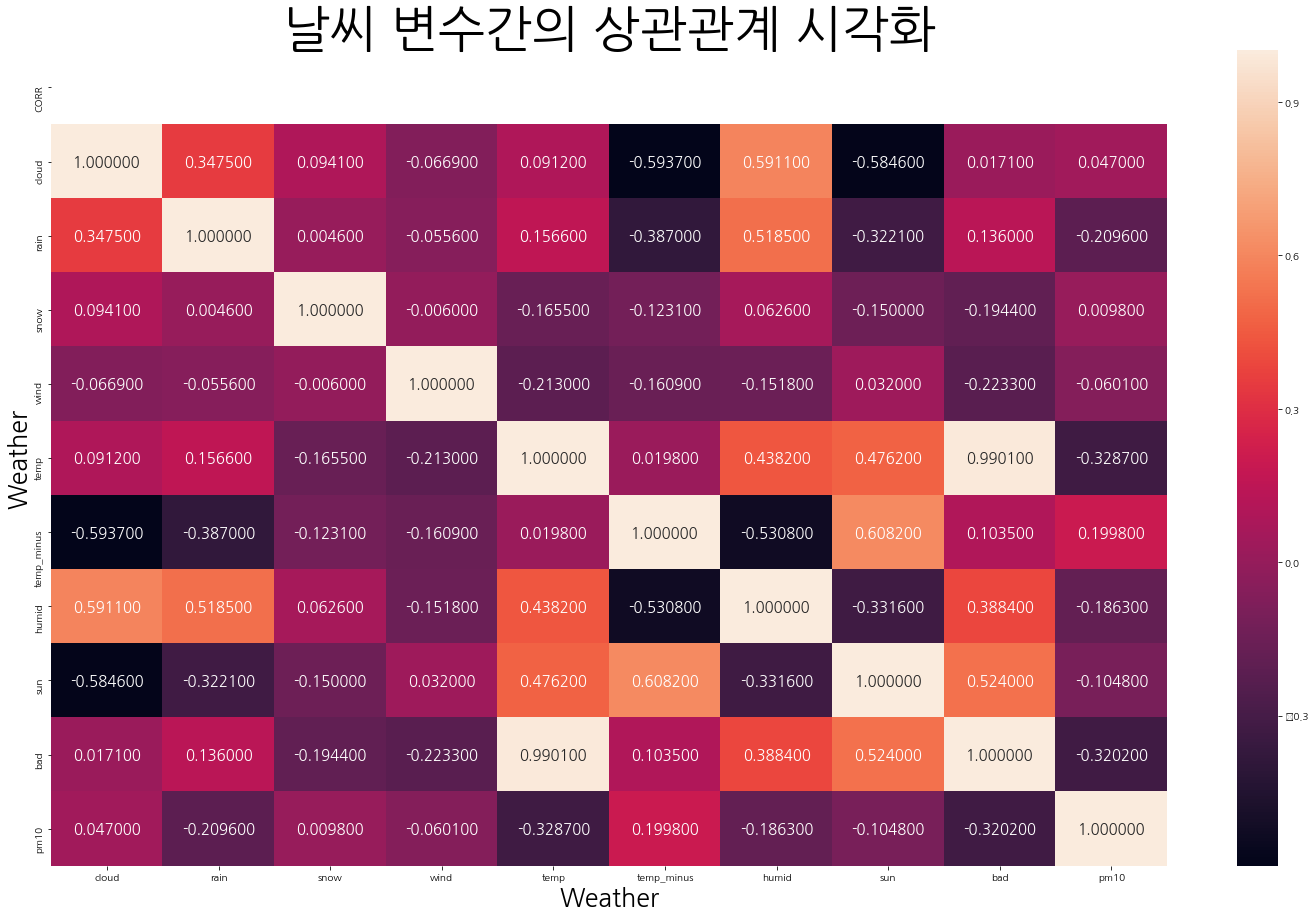

In [16]:
plt.figure(figsize=(25, 15))

sb.heatmap(cor_weather_result.astype(float),annot=True, annot_kws={'size':15}, fmt='f')

plt.title('날씨 변수간의 상관관계 시각화', fontsize=50)
plt.xlabel('Weather', fontsize=25)

plt.ylabel('Weather', fontsize=25)



In [11]:
import pickle
plt.rc('font', family='NanumGothic')
from pyecharts import Pie, Bar, Line

In [12]:
items_sd=pd.read_csv("./weather-bigcon/sd_30.csv",sep=",")
items_sd

,Unnamed: 0,sd
0,기초.화장용.크림,133.616814
1,생수,130.711934
2,커피음료,120.243722
3,돼지.곱창,92.993891
4,네일.메이크업.용품,92.107580
5,카페.푸드,82.281010
6,회,82.051630
7,기초.화장용.에센스,78.210521
8,스킨케어.마스크팩,76.906166
9,감귤.한라봉.오렌지,74.882181


In [13]:
pie_data=items_sd['sd']
pie_data

0     133.616814
1     130.711934
2     120.243722
3      92.993891
4      92.107580
5      82.281010
6      82.051630
7      78.210521
8      76.906166
9      74.882181
10     73.911482
11     71.178912
12     58.110625
13     54.265938
14     54.079435
15     53.498060
16     49.422625
17     47.287628
18     45.994826
19     42.229548
20     41.185211
21     39.414618
22     37.676457
23     36.912000
24     35.961434
25     35.700648
26     35.522794
27     35.510933
28     34.942175
29     34.932261
Name: sd, dtype: float64

In [15]:
attr = items_sd['Unnamed: 0']
v1 = round(items_sd['sd'],0)

pie = Pie("구매변동 이력 표준편차 ",
          width=950, height=700)
pie.add("",attr, v1, center=[45,50], radius=[30,75], is_label_show=True, label_text_size=12,
        legend_orient='vertical', legend_pos='right', legend_text_size=12)
pie